In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    """
    Parámetros:
    x(array): arreglo de coordenadas
    
    Regresa:
    (array): funcion"""
    return  np.sin(np.pi*x)

def g(x):
    """
    Paramétros:
    x(array): coord
    
    Regresa:
    0 (int)"""
    return 0

def  solExacta(x,t):
    """
    Parametros:
    x(array): coord
    t(array): tiempo"""
    return  np.sin(np.pi*x)*np.cos(2*np.pi*t)

def  calcError(sol_n , sol_e):
    """Parametros:
    sol_n(array)
    sol_E(array)"""
    return  np.abs(sol_n -sol_e)

def  condicionesIniciales(l,ht,u,x,op=1):
    """
    Parametros:
    l(float): parametro lambda
    ht(float): paso dle tiempo
    u(func): funcion u
    x(array): coordenadas
    
    Regresa:
    w(array)
    """
    N = len(u)
    w = np.zeros(N)
    for i in  range(1,N-1):
        if op == 1:
            w[i]=u[i]+ht*g(x[i])
        else:
            w[i]=(1-l**2)*u[i]+0.5*l**2*(u[i+1]+u[i-1]) + ht * g(x[i])
    return w

def  solver(u,w,N,x,Nt,l,ts):
    """
    Parametros:
    u(func): funcion u
    w(array): arreglo w
    N(int): incognitas internas
    x(array): arreglo coordenadas
    Nt(int): total de pasos
    l(float): parámetro lambda
    ts(array): arreglo de tiempo"""
    s = np.zeros(N+2)
    for n in  range(1,N+1):
        for i in  range(1,N+1):
            s[i]=2*(1-l**2) * w[i]+l**2*(w[i+1]+w[i-1])-u[i]
        solExa=solExacta(x,ts[n])
        u = w.copy()
        w = s.copy()
        if n==1:
            plt.plot(x,solExa,'tab:grey',label='Solución Exacta')
            plt.plot(x,s,'ko',label='Solución Numérica')
        plt.plot(x,solExa,'tab:grey')
        plt.plot(x,s,'ko')
    return s

In [3]:
L = 1          # Longitud  del  dominio
N = 20         # Numero  de  incognitas  internas
Tmax = 1.0     # Tiempo  maximo  de  simulacion
ht = 0.05      # Paso de  tiempo
alpha = 2      # Dato  fisico
h = L / (N+2) # Tamanio  de la malla  espacial
Nt = int(Tmax / ht)     # Numero  total  de  pasos
lamb = alpha * ht / h   # Parametro  lambda
if lamb>1: # condicion de estabilidad
    lamb=1
Tmax = Nt * ht           # Tiempo  total  de  simulacion

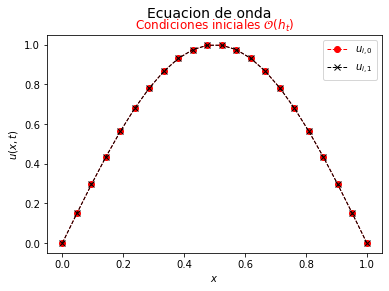

In [4]:
x = np.linspace(0,L,N+2)   # Coordenadas  de la  malla

u = f(x)                      # Condicion  inicial
w = condicionesIniciales(lamb , ht, u, x, op=1) # Euler :op = 1
plt.suptitle('Ecuacion de onda', fontsize =14)
plt.plot(x, u,'ro--', lw = 1, label = "$u_{i,0}$")
plt.plot(x, w,'kx--', lw = 1, label = "$u_{i,1}$")
plt.title('Condiciones iniciales $\mathcal{O}(h_t)$', color='red', fontsize =12)
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.legend()
plt.savefig('condicion_O1.jpeg')
plt.show()

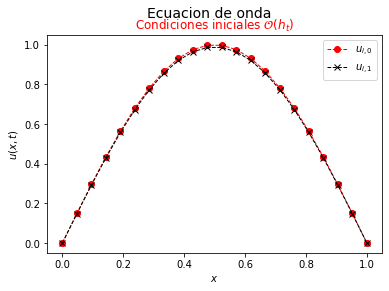

In [5]:
x = np.linspace(0,L,N+2)   # Coordenadas  de la  malla
u = f(x)                      # Condicion  inicial
w = condicionesIniciales(lamb , ht, u, x, op=2) # Euler :op = 1
plt.suptitle('Ecuacion de onda', fontsize =14)
plt.plot(x, u,'ro--', lw = 1, label = "$u_{i,0}$")
plt.plot(x, w,'kx--', lw = 1, label = "$u_{i,1}$")
plt.title('Condiciones iniciales $\mathcal{O}(h_t)$', color='red', fontsize =12)
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.legend()
plt.savefig('condicion_O3.jpeg')
plt.show()

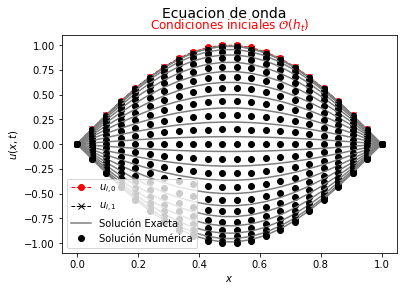

In [6]:
ts=np.linspace(0,(Tmax/2),(N+2))
plt.plot(x, u,'ro--', lw = 1, label = "$u_{i,0}$")
plt.plot(x, w,'kx--', lw = 1, label = "$u_{i,1}$")
plt.suptitle('Ecuacion de onda', fontsize =14)
plt.title('Condiciones iniciales $\mathcal{O}(h_t)$', color='red', fontsize =12)
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
w = condicionesIniciales(lamb , ht, u, x, op = 1) # Euler :op = 1
s = solver(u, w, N, x, Nt, lamb,ts)
plt.legend()
plt.savefig('condicionc_O1.jpeg')
plt.show()

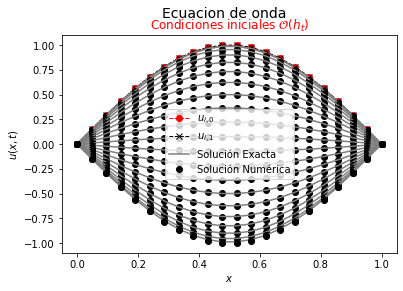

In [7]:
plt.plot(x, u,'ro--', lw = 1, label = "$u_{i,0}$")
plt.plot(x, w,'kx--', lw = 1, label = "$u_{i,1}$")
plt.suptitle('Ecuacion de onda', fontsize =14)
plt.title('Condiciones iniciales $\mathcal{O}(h_t)$', color='red', fontsize =12)
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
w = condicionesIniciales(lamb , ht, u, x, op = 2) # Euler :op = 2
s = solver(u, w, N, x, Nt, lamb,ts)
plt.legend()
plt.savefig('condicionc_O3.jpeg')
plt.show()